In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import glob, os
import matplotlib as mpl
from shapely.geometry import Point, Polygon

<AxesSubplot:>

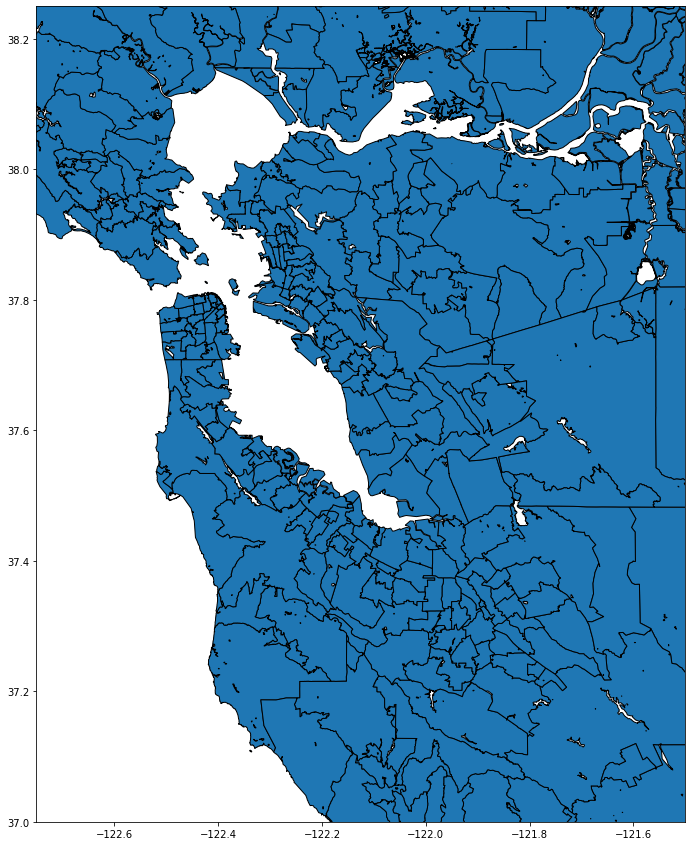

In [2]:
# Generate the census map diagram, and plot it
census_map = gpd.read_file('/home/bklofas/code/TG00CAZCTA.shp')
census_map = census_map.to_crs('EPSG:4326')
fig,ax = plt.subplots(figsize = (15,15))
ax.set_ylim([37, 38.25])
ax.set_xlim([-122.75, -121.5])
census_map.plot(ax = ax, linewidth=1, edgecolor='black')

In [3]:
# Make a list of all the log filenames in the folder.
all_files = glob.glob("*.log")

li = []

# Iterate thru each file and grab the last line. Append each last line to li list.
for filename in all_files:
    df = pd.read_csv(filename)
    df2 = df.tail(1)
    li.append(df2)

# Concat the list into a single dataframe.
dataframe = pd.concat(li, axis=0, ignore_index=True)

print(dataframe)

                    timestamp    serial  frame       lat        lon      alt  \
0    2021-05-15T01:02:21.000Z  S3850125   8809  37.93630 -121.37528   1839.0   
1    2021-05-20T00:49:41.000Z  S4220310   8013  37.85532 -121.16866   1685.5   
2    2021-04-01T13:12:36.001Z  S3240383   9629  37.91670 -121.17692   2407.3   
3    2021-04-15T12:47:30.001Z  S3541028   7443  37.48039 -121.05749   8831.8   
4    2021-03-21T00:51:13.000Z  S3231555   8051  37.77150 -121.06305   6902.6   
..                        ...       ...    ...       ...        ...      ...   
332  2020-11-01T13:00:57.001Z  S1340489   8522  37.69851 -122.13534   1826.1   
333  2020-12-13T00:30:17.000Z  S1341157   6878  37.07430 -121.45573   9566.6   
334  2020-11-06T13:00:26.001Z  S1340579   6933  38.04174 -121.23738  33239.4   
335  2021-05-11T01:04:31.000Z  S3951026   8924  37.46177 -121.68279   1769.8   
336  2021-03-17T12:44:07.001Z  S3250188   7592  38.01219 -121.10752   2753.1   

     vel_v  vel_h  heading   temp  humi

In [4]:
# Create geometry points based on the lat/long from each row in the dataframe
geometry = [Point(xy) for xy in zip( dataframe["lon"], dataframe["lat"]) ]
dataframe[:3]

timestamp    serial  frame       lat        lon     alt  \
0  2021-05-15T01:02:21.000Z  S3850125   8809  37.93630 -121.37528  1839.0   
1  2021-05-20T00:49:41.000Z  S4220310   8013  37.85532 -121.16866  1685.5   
2  2021-04-01T13:12:36.001Z  S3240383   9629  37.91670 -121.17692  2407.3   

   vel_v  vel_h  heading  temp  humidity  pressure      type  freq_mhz  snr  \
0  -14.4    6.1     85.8  16.1       7.0     811.7  RS41-SGP   404.000  8.7   
1  -15.4    4.4     45.0   8.7      15.2     824.5  RS41-SGP   404.001  7.5   
2  -11.1    6.6     18.8   6.5      17.6     760.8  RS41-SGP   404.001  9.0   

   f_error_hz  sats  batt_v burst_timer  aux_data  
0         187     9     2.7    08:04:13        -1  
1        -187    10     2.7    08:14:23        -1  
2        -750     8     2.6    07:55:08        -1

In [5]:
# Make a GeoPandas dataframe from the dataframe and the geometry points
geo_frame = gpd.GeoDataFrame(dataframe,            #specify data
                             crs = 'EPSG:4326',    #specify coordinate ref system
                             geometry = geometry)  #specify geometry list created
geo_frame.head()


timestamp    serial  frame       lat        lon     alt  \
0  2021-05-15T01:02:21.000Z  S3850125   8809  37.93630 -121.37528  1839.0   
1  2021-05-20T00:49:41.000Z  S4220310   8013  37.85532 -121.16866  1685.5   
2  2021-04-01T13:12:36.001Z  S3240383   9629  37.91670 -121.17692  2407.3   
3  2021-04-15T12:47:30.001Z  S3541028   7443  37.48039 -121.05749  8831.8   
4  2021-03-21T00:51:13.000Z  S3231555   8051  37.77150 -121.06305  6902.6   

   vel_v  vel_h  heading  temp  ...  pressure      type freq_mhz  snr  \
0  -14.4    6.1     85.8  16.1  ...     811.7  RS41-SGP  404.000  8.7   
1  -15.4    4.4     45.0   8.7  ...     824.5  RS41-SGP  404.001  7.5   
2  -11.1    6.6     18.8   6.5  ...     760.8  RS41-SGP  404.001  9.0   
3  -21.8   47.6    100.7 -40.0  ...     317.2  RS41-SGP  404.000  7.8   
4  -12.1   27.7     90.7 -33.8  ...     413.9  RS41-SGP  404.001  8.1   

   f_error_hz  sats  batt_v  burst_timer aux_data                     geometry  
0         187     9     2.7     08:04:13       -1  POINT (-121.37528 37.93630)  
1        -187    10     2.7     08:14:23       -1  POINT (-121.16866 37.85532)  
2        -750     8     2.6     07:55:08       -1  POINT (-121.17692 37.91670)  
3         750     8     2.5     08:22:20       -1  POINT (-121.05749 37.48039)  
4        -750     8     2.5     08:10:20       -1  POINT (-121.06305 37.77150)  

[5 rows x 21 columns]

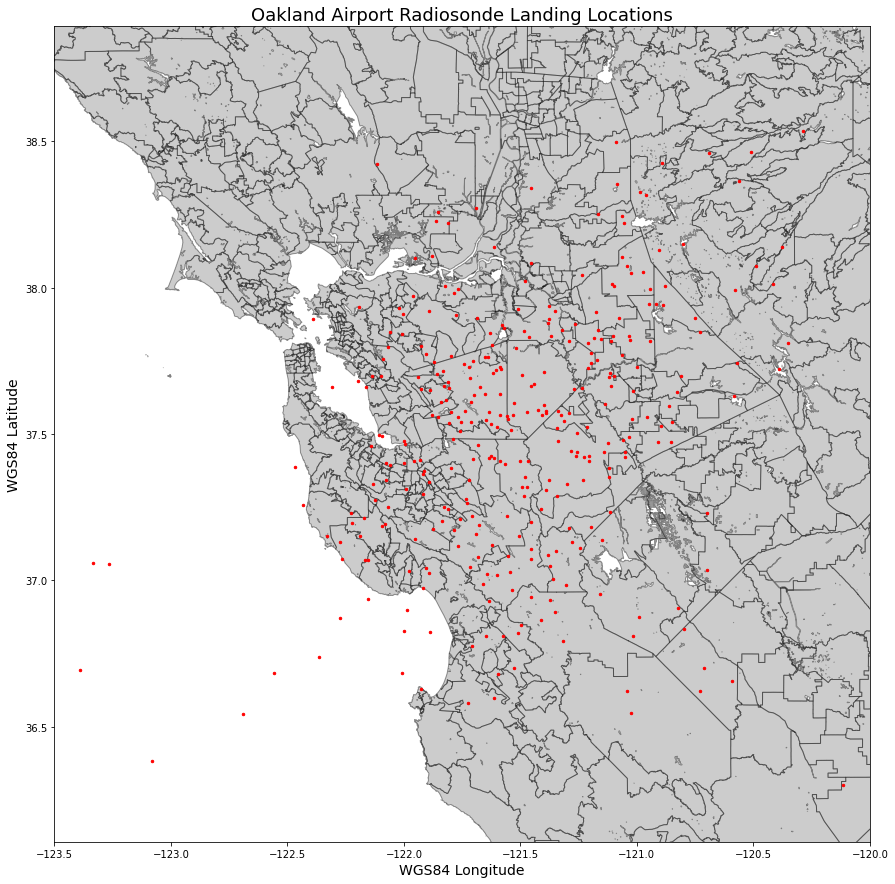

In [6]:
# Plot the census map, then plot the GeoPandas dataframe on top.
fig,ax = plt.subplots(figsize = (15,15))
ax.set_box_aspect(1)
ax.set_ylim([37.0, 38.0])    # This doesn't do anything because aspect ratio is 1, set by longitude
ax.set_xlim([-123.5, -120.0])
ax.set_ylabel('WGS84 Latitude', fontsize=14)
ax.set_xlabel('WGS84 Longitude', fontsize=14)
ax.set_title('Oakland Airport Radiosonde Landing Locations', fontsize=18)

census_map.plot(ax = ax, alpha = 0.4, color="grey", linewidth=1, edgecolor='black')

geo_frame.plot(ax = ax, markersize = 6, color = "red", marker = "o")

# Save the plot locally
plt.savefig('last-position.jpg', bbox_inches='tight')